In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import missingno

In [3]:
df = pd.read_csv("adult.data.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [51]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df['race'].value_counts()

race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

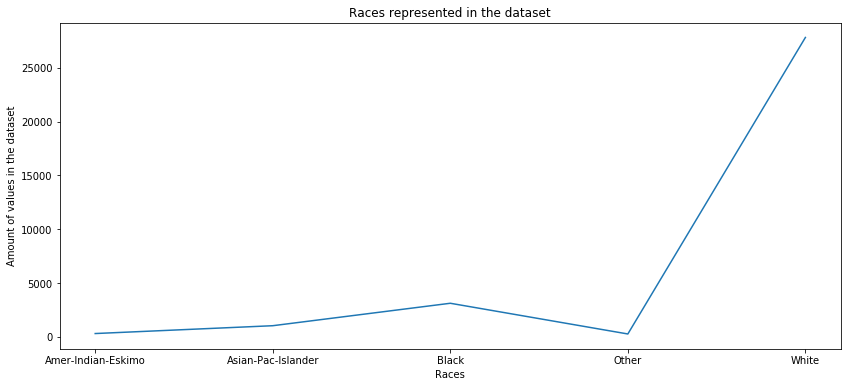

In [57]:
plt.figure(figsize=(14,6))
plt.title("Races represented in the dataset")
plt.xlabel("Races")
plt.ylabel("Amount of values in the dataset")
sns.lineplot(data=race_count.sort_val())

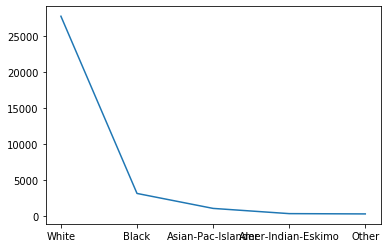

In [48]:

p = plt.plot(s.index, s.values)

In [13]:
# What is the average age of men?
filter_ave_age = df[df['sex'] == 'Male']['age'].mean()
average_age_men = round(filter_ave_age, 1)

average_age_men

39.4

In [14]:
# What is the percentage of people who have a Bachelor's degree?
filter_percent_bachelor = (df[df['education'] == 'Bachelors'].shape[0] / df.shape[0]) * 100
percentage_bachelors = round(filter_percent_bachelor, 1)

percentage_bachelors

16.4

In [20]:
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
    # What percentage of people without advanced education make more than 50K?

    # with and without `Bachelors`, `Masters`, or `Doctorate`
higher_education = df.loc[df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]
lower_education = df.loc[~df['education'].isin(['Bachelors', 'Masters', 'Doctorate'])]

    # percentage with salary >50K
filer_higher_edu = higher_education[higher_education['salary'] == '>50K']['salary'].count() / \
                       higher_education.shape[0] * 100
higher_education_rich = round(filer_higher_edu, 2)
filer_lower_edu = lower_education[lower_education['salary'] == '>50K']['salary'].count() / \
                      lower_education.shape[0] * 100
lower_education_rich = round(filer_lower_edu, 2)

higher_education_rich

46.54

In [21]:
lower_education_rich

17.37

In [22]:
# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df['hours-per-week'].min()

min_work_hours

1

In [25]:
 # What percentage of the people who work the minimum number of hours per week have a salary of >50K?
filter_num_min_workers = df[df['hours-per-week'] == 1]['hours-per-week'].count()
num_min_workers = round(filter_num_min_workers, 1)

filter_rich_percentage = (float(df[(df['hours-per-week'] == min_work_hours) & (df['salary'] == '>50K')].shape[0]) /
                             num_min_workers) * 100
rich_percentage = round(filter_rich_percentage, 1)

rich_percentage

10.0

In [27]:
# What country has the highest percentage of people that earn >50K?
# BeauCarnes
highest_earning_country = ""
highest_earning_country_percentage = 0
for country, sub_df in df.groupby(['native-country']):
    percentage = len(sub_df[(sub_df['salary'] == '>50K')]) / len(sub_df)
    if highest_earning_country_percentage < percentage:
        highest_earning_country_percentage = round(percentage, 3)
        highest_earning_country = country
highest_earning_country_percentage *= 100

highest_earning_country

'Iran'

In [28]:
# Identify the most popular occupation for those who earn >50K in India.
top_IN_occupation = df[(df['salary'] == '>50K') & (df['native-country'] == 'India')].loc[:,
                        'occupation'].value_counts()[:1].sort_values(ascending=False)

top_IN_occupation

Prof-specialty    25
Name: occupation, dtype: int64